In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_feat = pd.read_csv(r'C:\Users\Avishkar\OneDrive\Documents\hw dataset\x_train_all.csv')

In [3]:
Y_labels = pd.read_csv(r'C:\Users\Avishkar\OneDrive\Documents\hw dataset\y_train_all.csv')

### SPLIT THE DATA INTO FEATURE ANND LABELS

In [4]:
X = X_feat.iloc[:, :-1]
y = X_feat.iloc[:, -1]

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

### TRAIN THE MODEL ON TRAINING DATA SET

In [6]:
tree_clf = DecisionTreeClassifier(random_state=42,max_depth=2)
tree_clf.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=2, random_state=42)

### plotting DT

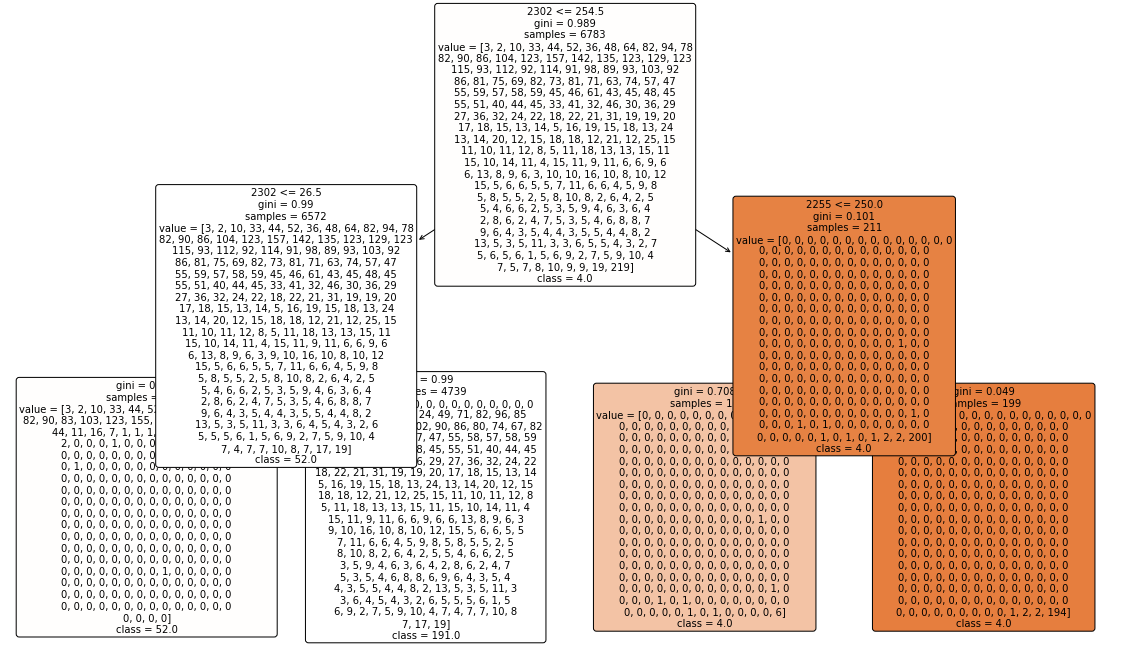

In [7]:
plt.figure(figsize=(20,10))
str_class = y.unique().astype(str)
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=str_class, rounded=True, fontsize=10)
plt.show()

In [8]:
y_pred = tree_clf.predict(xtest)

### finding probabilities

In [10]:
y_probability = tree_clf.predict_proba(xtest)

In [11]:
X_F= X_feat
y_F= Y_labels

In [12]:
cv_scores = cross_val_score(tree_clf, X_F, y_F, cv=10, scoring='accuracy')

In [13]:
cv_scores

array([0.35913313, 0.31682147, 0.38183695, 0.44788442, 0.60887513,
       0.50257998, 0.24355005, 0.35706914, 0.54592363, 0.37770898])

In [14]:
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.35913313 0.31682147 0.38183695 0.44788442 0.60887513 0.50257998
 0.24355005 0.35706914 0.54592363 0.37770898]


In [15]:
accuracy_scores = cross_val_score(tree_clf, X_F, y_F, cv=10, scoring='accuracy')

In [16]:
print("Accuracy Scores for Each Fold:", accuracy_scores)

Accuracy Scores for Each Fold: [0.35913313 0.31682147 0.38183695 0.44788442 0.60887513 0.50257998
 0.24355005 0.35706914 0.54592363 0.37770898]


In [17]:
from sklearn.model_selection import cross_val_predict

In [18]:
predicted_labels = cross_val_predict(tree_clf, X_F, y_F, cv=10)
conf_matrix = confusion_matrix(y, predicted_labels)

In [19]:
TP = conf_matrix.diagonal()
FP = conf_matrix.sum(axis=0) - TP
TN = conf_matrix.sum() - (FP + TP)
FN = conf_matrix.sum(axis=1) - TP

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
precision = TP / (TP + FP)
recall = TPR

### measuring for every fold

In [20]:
for fold in range(10):
    print(f"Fold {fold + 1}:")
    print("TPR:", TPR[fold])
    print("FPR:", FPR[fold])
    print("Precision:", precision[fold])
    print("Recall:", recall[fold])
    print()


Fold 1:
TPR: nan
FPR: 0.426625386996904
Precision: 0.0
Recall: nan

Fold 2:
TPR: nan
FPR: 0.15913312693498452
Precision: 0.0
Recall: nan

Fold 3:
TPR: nan
FPR: 0.3079463364293086
Precision: 0.0
Recall: nan

Fold 4:
TPR: 1.0
FPR: 0.1059260788767293
Precision: 0.003883495145631068
Recall: 1.0

Fold 5:
TPR: 0.0
FPR: 0.0
Precision: nan
Recall: 0.0

Fold 6:
TPR: 0.0
FPR: 0.0
Precision: nan
Recall: 0.0

Fold 7:
TPR: 0.0
FPR: 0.0
Precision: nan
Recall: 0.0

Fold 8:
TPR: 0.0
FPR: 0.0
Precision: nan
Recall: 0.0

Fold 9:
TPR: 0.0
FPR: 0.0
Precision: nan
Recall: 0.0

Fold 10:
TPR: 0.0
FPR: 0.0
Precision: nan
Recall: 0.0



### various parameters

In [ ]:

results={}
for max_depth in [3, 5, 7, 10]:
    for min_samples_split in [2, 5, 10]:
        for criterion in ['gini', 'entropy']:
            for min_samples_leaf in [1, 2, 4]:
                tree_clf = DecisionTreeClassifier(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    criterion=criterion,
                    min_samples_leaf=min_samples_leaf)
                scores = cross_val_score(tree_clf, X_F, y_F, cv=10, scoring='accuracy')
                avg_score = np.mean(scores)
                
                results[(max_depth, min_samples_split, criterion, min_samples_leaf)] = avg_score



In [ ]:
best_params = max(results, key=results.get)
best_score = results[best_params]

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

#### Make new training and testing sets, by moving 30% of the instances from the original training set into the testing set

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_feat,Y_labels,test_size=0.3,random_state=42)

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train,y_train)

x_train_pred_accuracy= tree_clf.predict(x_train)

In [ ]:
## training accuracy

train_accuracy = accuracy_score(y_train, x_train_pred_accuracy)
print("Training Accuracy:", train_accuracy)

In [ ]:
### testing accuracy

x_test_pred_acc = tree_clf.predict(x_test)

In [ ]:
test_accuracy = accuracy_score(y_test, x_test_pred_acc)
print("Testing Accuracy:", test_accuracy)

#### Make new training and testing sets, by moving 60% of the instances from the original training set into the testing set

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_feat,Y_labels,test_size=0.6,random_state=42)

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train,y_train)

y_train_pred_accuracy= tree_clf.predict(x_train)

In [ ]:

train_accuracy = accuracy_score(y_train, y_train_pred_accuracy)
print("Training Accuracy:", train_accuracy)

In [ ]:

y_test_pred_acc = tree_clf.predict(x_test)

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred_acc)
print("Testing Accuracy:", test_accuracy)